In [ ]:
!pip install pyspark py4j

In [ ]:
!pip install findspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
          .appName("pyspark_test") \
          .getOrCreate()

Импортируем таблицу категорий, продуктов, а также соответствий продуктов к определенным категориям, отношений

In [ ]:
categories_df = spark.read.csv("/content/prod-category/categories.csv", header=True, inferSchema=True)
categories_df.show()

+-----------+-------------+
|category_id|category_name|
+-----------+-------------+
|          1|         Food|
|          2|  Electronics|
|          3|      Housing|
|          4|       Phones|
+-----------+-------------+



In [ ]:
products_df = spark.read.csv("/content/prod-category/products.csv", header=True, inferSchema=True)
products_df.show()

+-------+----------------+
|prod_id|       prod_name|
+-------+----------------+
|      1|  Pineapple 1 kg|
|      2|     Banana 1 kg|
|      3|Iphone XV Better|
|      4|   Samsung Omega|
|      5|Carpet 120x87 cm|
|      6|  Vitamines 80 g|
|      7| Magnesium 500 g|
+-------+----------------+



In [ ]:
product_category_df = spark.read.csv("/content/prod-category/product-category.csv", header=True, inferSchema=True)
product_category_df.show()

+-------+-----------+
|prod_id|category_id|
+-------+-----------+
|      1|          1|
|      2|          1|
|      3|          2|
|      3|          4|
|      4|          2|
|      4|          4|
|      5|          3|
+-------+-----------+



Заметим, что продукты с ключами 6 и 7 не имеют категорий. Мы выведем их позже, но для начала выведем все соотношения продукт-категория с именами. Для этого будем использовать join

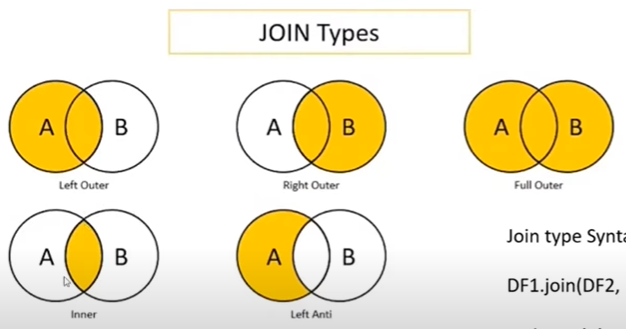

In [ ]:
# join by categories
pr_cat_pairs_df = product_category_df.join(categories_df, \
        product_category_df.category_id == categories_df.category_id, "inner")
# join by product keys
pr_cat_pairs_df = pr_cat_pairs_df.join(products_df, \
        products_df.prod_id == pr_cat_pairs_df.prod_id, "inner")
# from the resulting dataframe we need only names
pr_cat_pairs_df = pr_cat_pairs_df.select(["category_name", "prod_name"])
pr_cat_pairs_df.show()

+-------------+----------------+
|category_name|       prod_name|
+-------------+----------------+
|         Food|     Banana 1 kg|
|         Food|  Pineapple 1 kg|
|  Electronics|   Samsung Omega|
|  Electronics|Iphone XV Better|
|      Housing|Carpet 120x87 cm|
|       Phones|   Samsung Omega|
|       Phones|Iphone XV Better|
+-------------+----------------+



Выведем список товаров без указанных категорий

In [ ]:
# we need products are not present in product-category dataframe
# that's why we use left anti join
no_cat_pr = products_df.join(product_category_df, \
        product_category_df.prod_id == products_df.prod_id, "leftanti")
no_cat_pr.show()

+-------+---------------+
|prod_id|      prod_name|
+-------+---------------+
|      6| Vitamines 80 g|
|      7|Magnesium 500 g|
+-------+---------------+

